# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [38]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
# grupos de amigos de diferentes tamanhos
galera = np.arange(3,15)

In [56]:
# guardar informacao de convergencia para cada grupo de amigos
resultado = pd.DataFrame()
# precisamos varias interacoes pra ver o comportamento
numero_interacoes = 50
# testa convergencia para cada grupo de amigos
for amigos in galera:
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print amigos, i,'converge'
                resultado = resultado.append(pd.DataFrame([[amigos, i]], columns=['amigos', 'jogadas']))
                break

In [110]:
print resultado.describe()
media = resultado.groupby('amigos', as_index=False).mean()
print media

           amigos      jogadas
count  600.000000   600.000000
mean     8.500000   114.233333
std      3.454933   299.567912
min      3.000000     1.000000
25%      5.750000     2.000000
50%      8.500000    13.000000
75%     11.250000    77.000000
max     14.000000  3436.000000
    amigos  jogadas
0        3     1.36
1        4     1.84
2        5     3.64
3        6     5.18
4        7     9.82
5        8    15.80
6        9    29.34
7       10    49.22
8       11   107.52
9       12   188.64
10      13   326.28
11      14   632.16


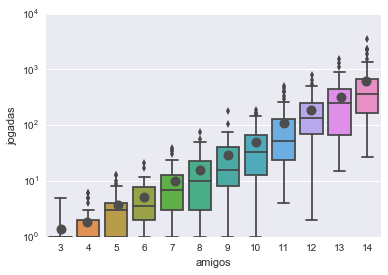

In [122]:
ax = sns.boxplot(x="amigos", y="jogadas", data=resultado)
# Add in points to show each observation
sns.stripplot(x="amigos", y="jogadas", data=media,
              jitter=True, size=10, color=".3", linewidth=0)

# Make the quantitative axis logarithmic
ax.set_yscale("log")